In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import itertools

In [ ]:
train_df = pd.read_csv('/content/DailyDelhiClimateTrain.csv', parse_dates=['date'], index_col=['date'])

test_df = pd.read_csv('/content/DailyDelhiClimateTrain.csv', parse_dates=['date'], index_col=['date'])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [ ]:
train_df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1453.000000,1453.000000,1453.000000,1453.000000
mean,25.474857,60.771971,6.794871,1008.269018
std,7.358206,16.783908,4.566871,7.437835
min,6.000000,13.428571,0.000000,991.375000
25%,18.750000,50.375000,3.475000,1001.625000
50%,27.714286,62.625000,6.166667,1008.571429
75%,31.285714,72.250000,9.202941,1014.937500
max,38.714286,100.000000,42.220000,1023.000000


In [ ]:
train_df = train_df[(train_df['meanpressure'] > 950) & (train_df['meanpressure'] < 1090)]

In [ ]:
train_df.loc[train_df['meanpressure'] == train_df['meanpressure'].max()].index

DatetimeIndex(['2014-01-19'], dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
train_df = train_df[(train_df['meanpressure'] > 950) & (train_df['meanpressure'] < 1090)]

Text(0.5, 0, 'Date')

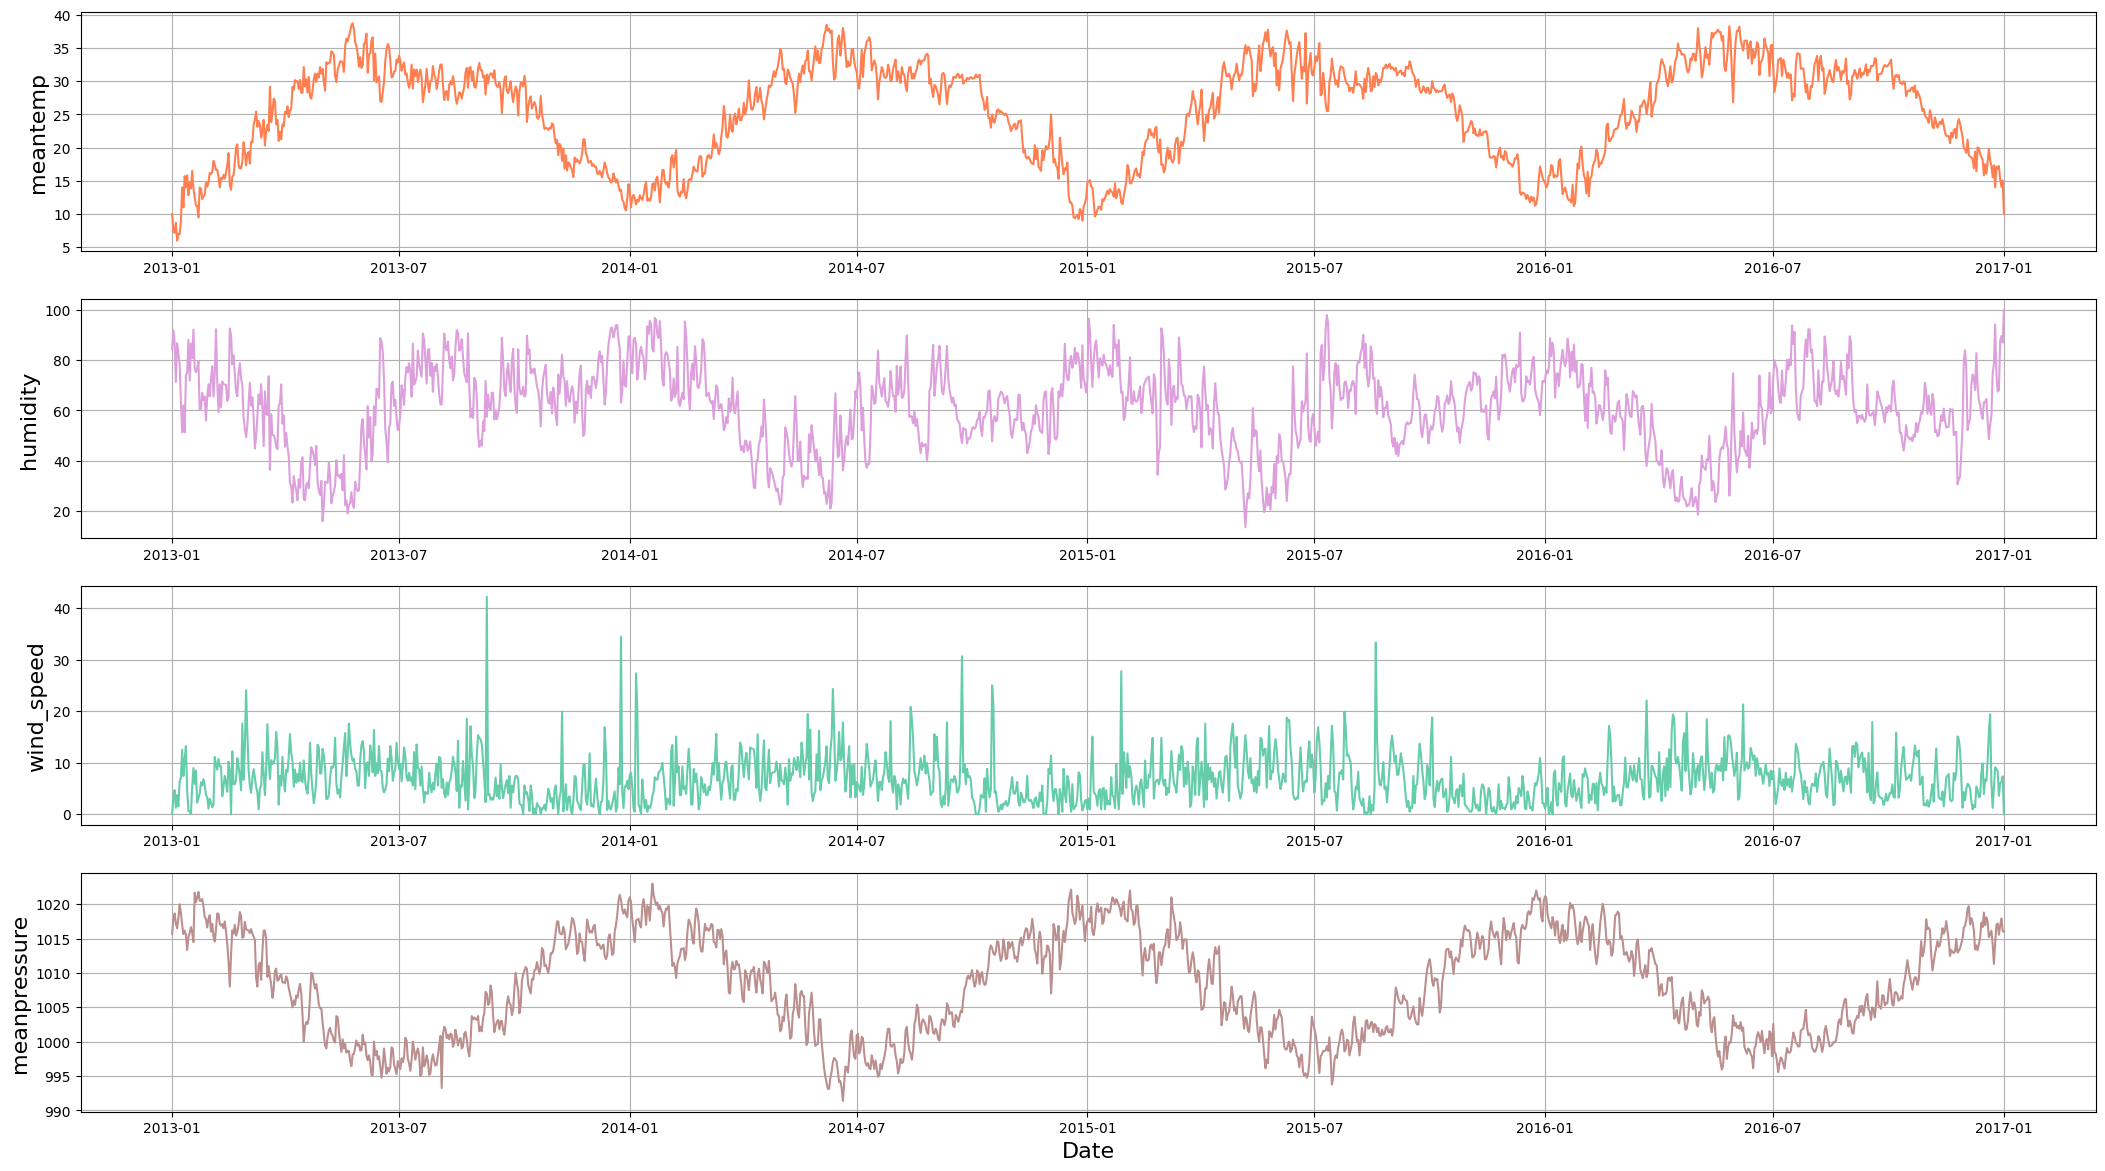

In [ ]:
plt.figure(figsize=(26, 18))
colors = ['#FF7F50', '#DDA0DD', '#66CDAA', '#BC8F8F']
for i, j in enumerate(train_df.columns):
  plt.subplot(len(train_df.columns) + 1, 1, i + 1)
  plt.plot(train_df[j], color=colors[i]);
  plt.ylabel(j, fontsize=16)
  plt.grid()
plt.xlabel('Date', fontsize=16)

In [ ]:
train_df_2015 = train_df['2015-01-01': '2016-01-01']

Text(0.5, 0, 'Date')

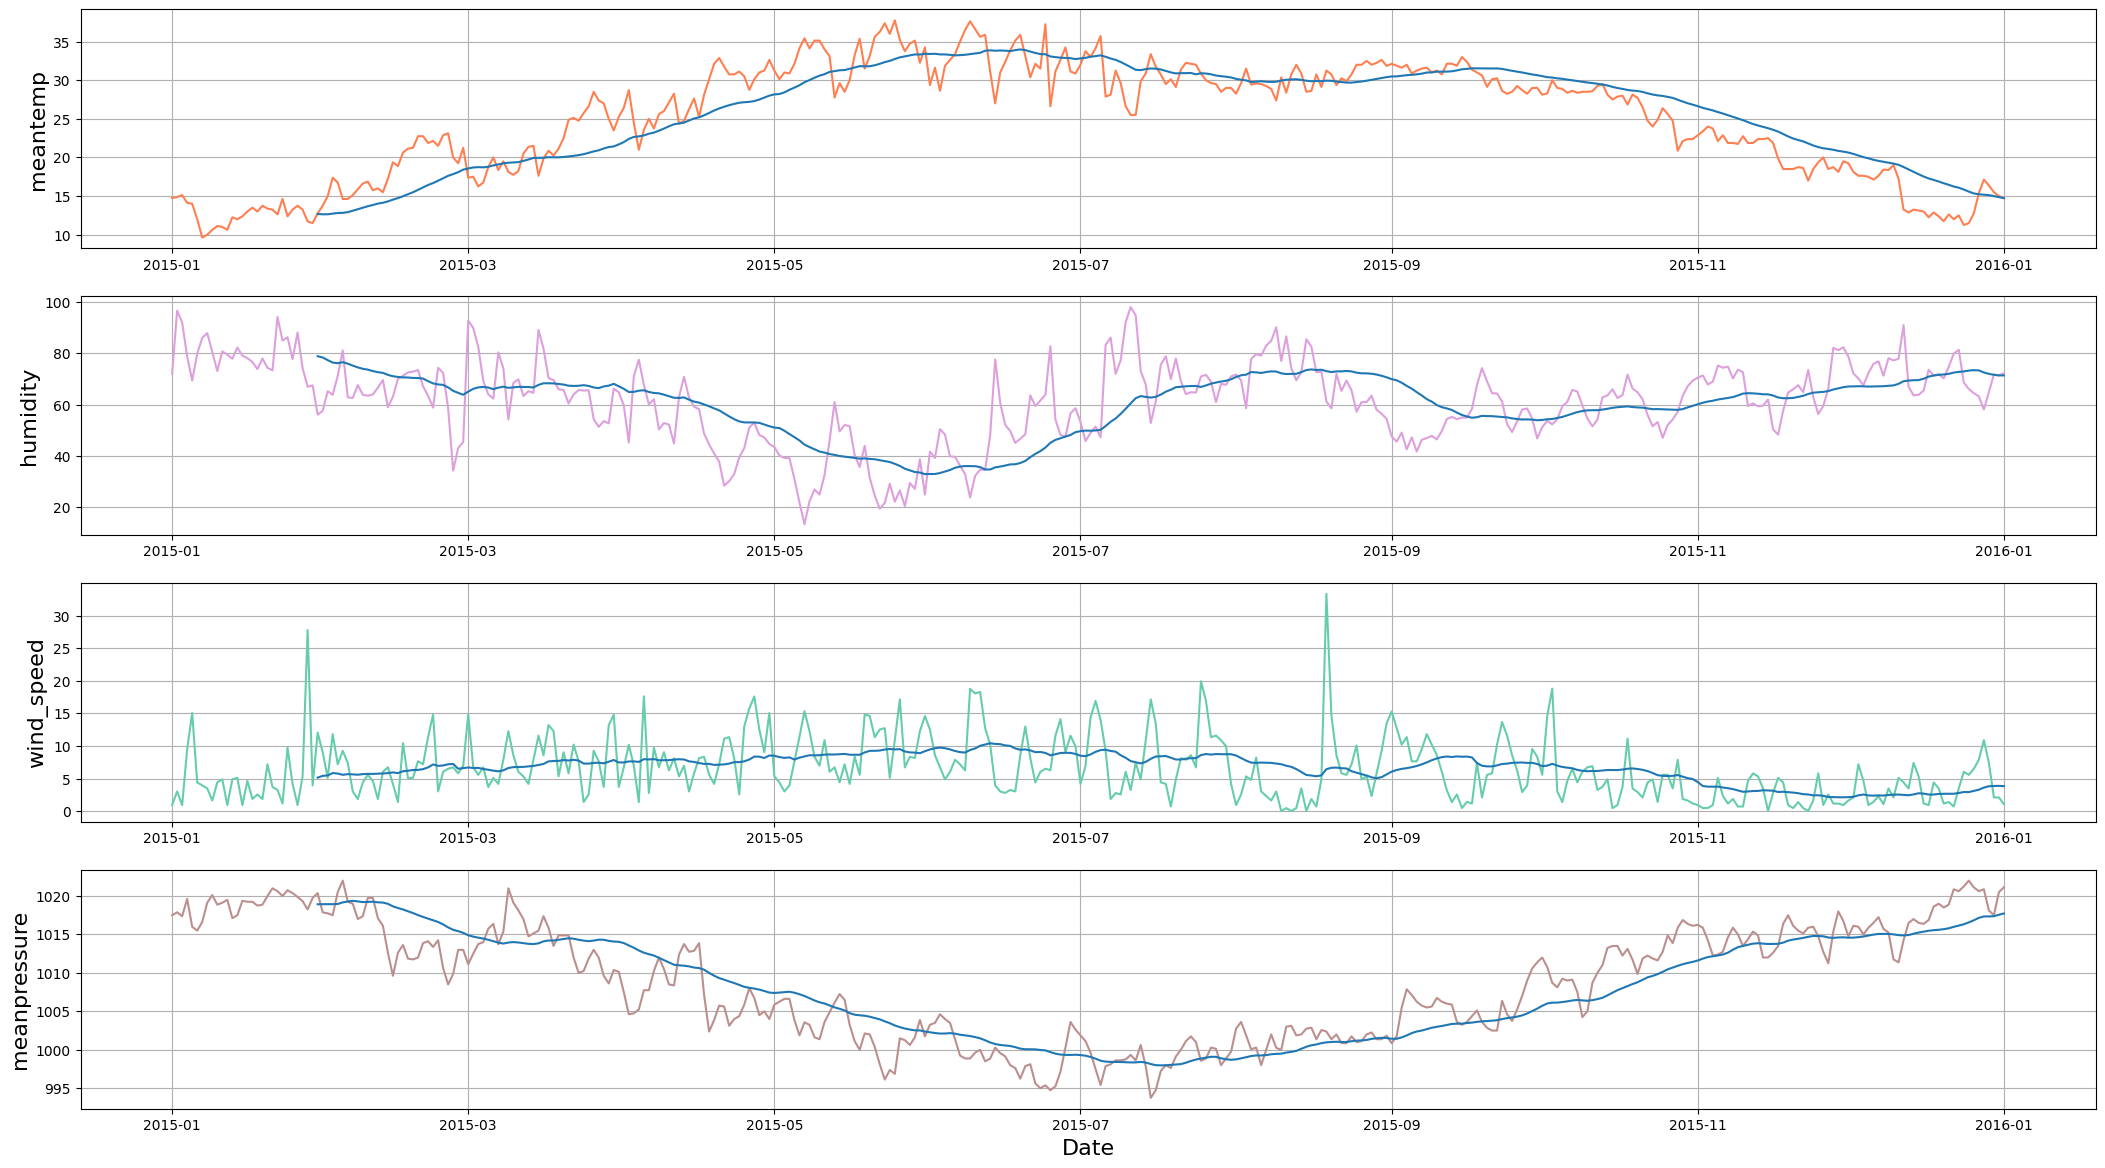

In [ ]:
plt.figure(figsize=(26, 18))
colors = ['#FF7F50', '#DDA0DD', '#66CDAA', '#BC8F8F']
for i, j in enumerate(train_df_2015.columns):
  plt.subplot(len(train_df_2015.columns) + 1, 1, i + 1)
  plt.plot(train_df_2015[j], color=colors[i]);
  plt.plot(train_df_2015[j].rolling(30).mean());
  plt.ylabel(j, fontsize=16)
  plt.grid()
plt.xlabel('Date', fontsize=16)

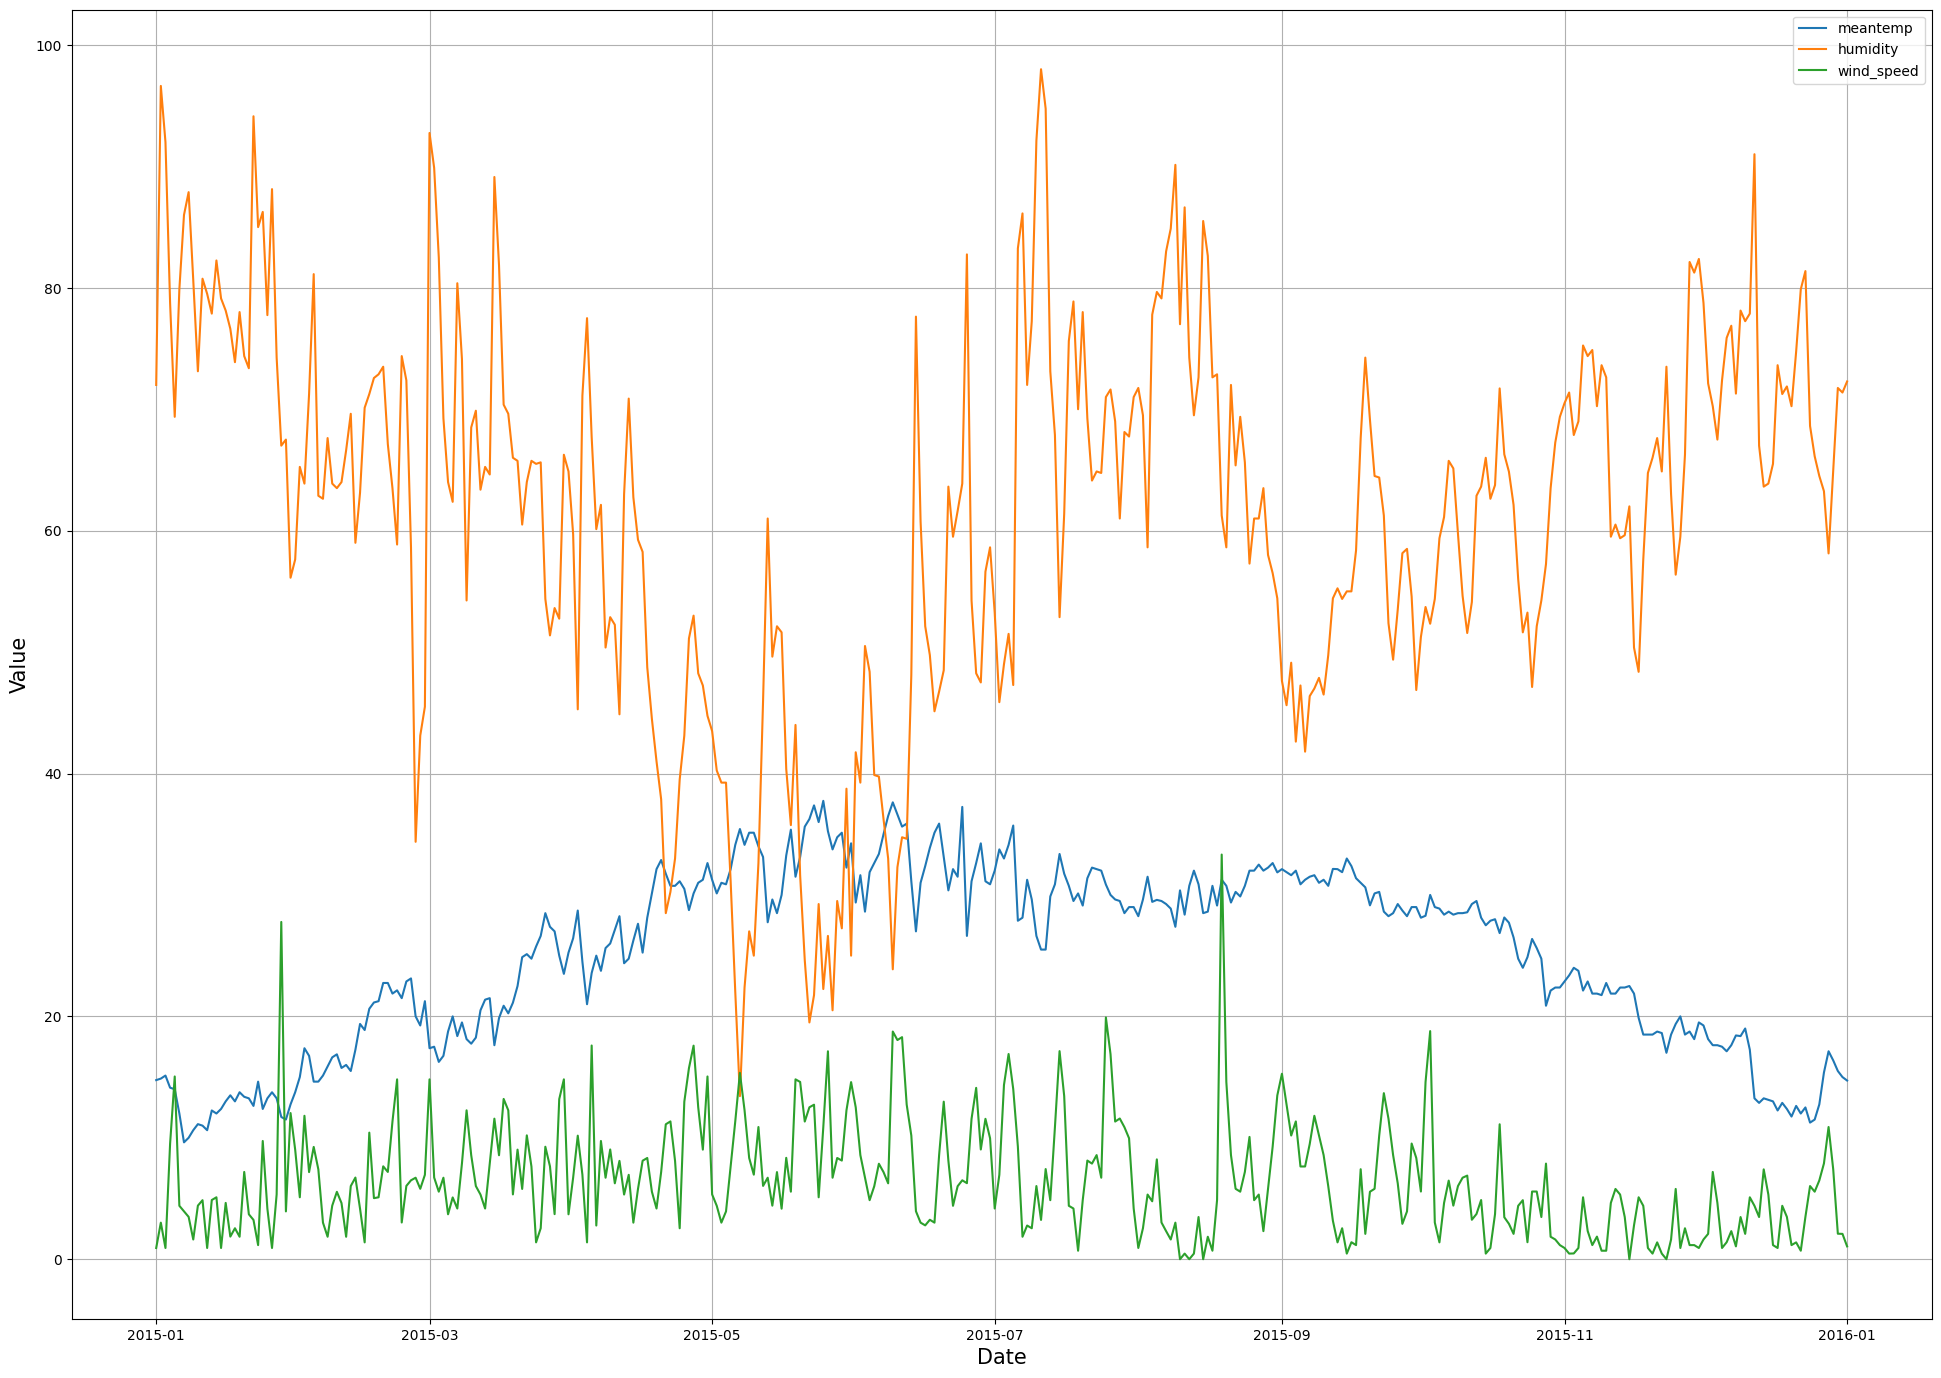

In [ ]:
plt.figure(figsize=(24, 17))
for i in train_df_2015.columns[:-1]:
  plt.plot(train_df_2015[i], label=i)
  plt.xlabel("Date", fontsize = 15)
  plt.ylabel('Value', fontsize = 15)
  plt.legend()
  plt.grid(True)

In [ ]:
ts_decomposition = seasonal_decompose(x=train_df['meantemp'], model='additive', period=365)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

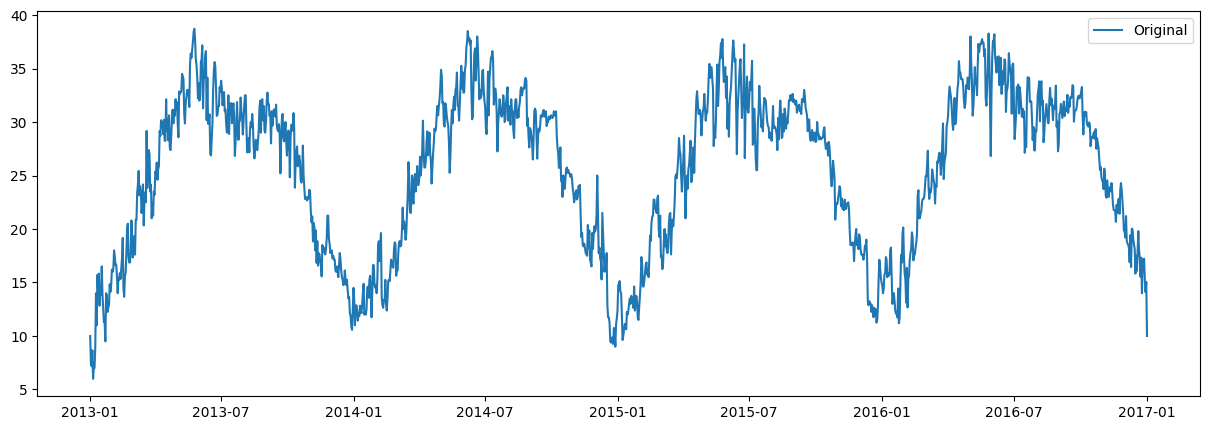

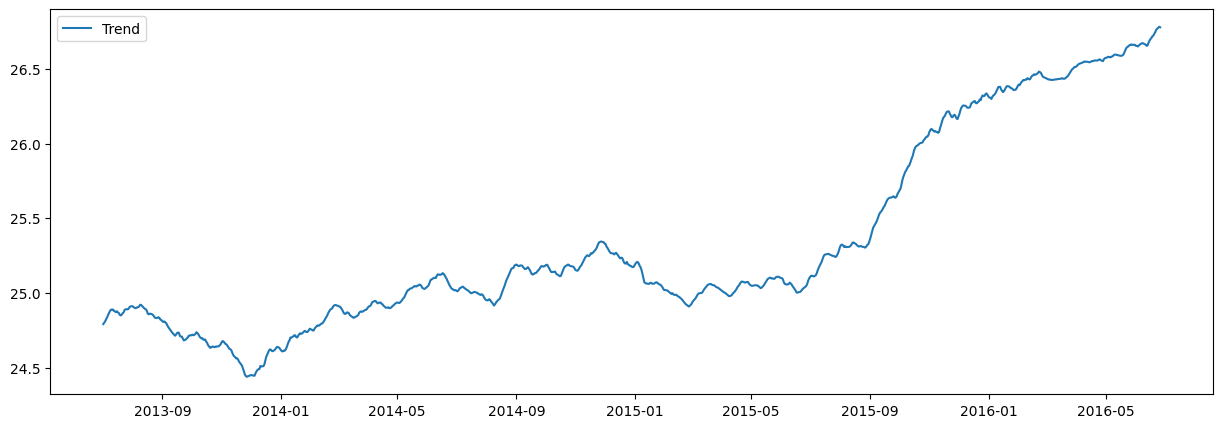

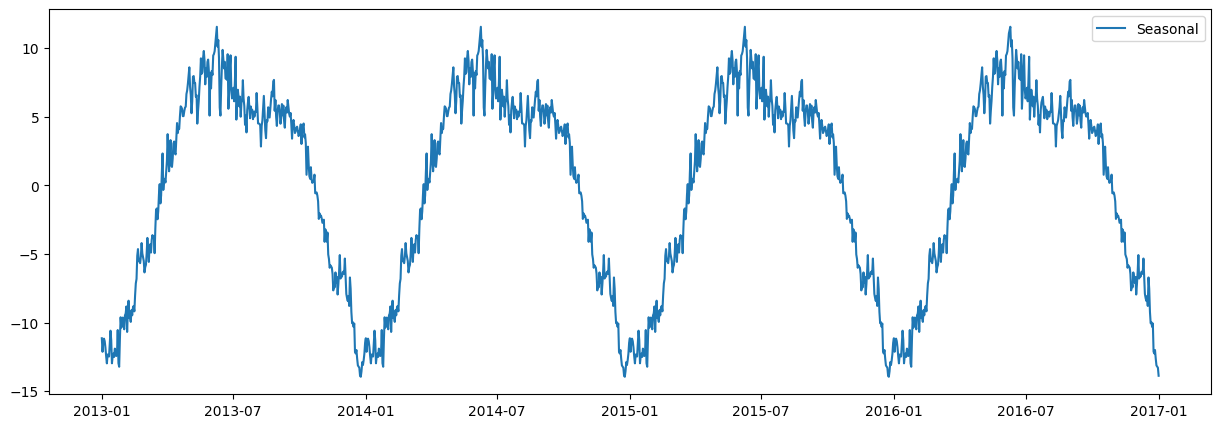

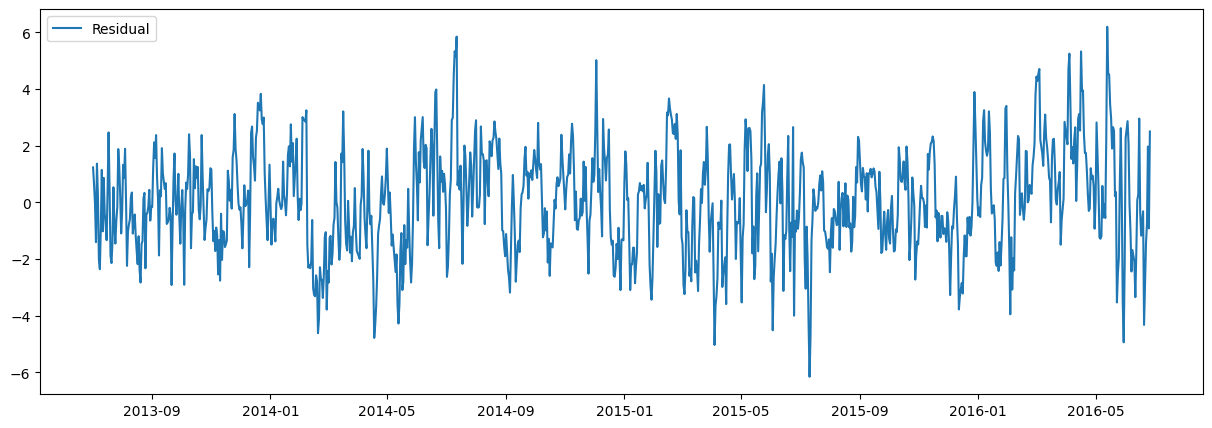

In [ ]:
residual_estimate = ts_decomposition.resid
plt.figure(figsize=(15,5))
plt.plot(train_df['meantemp'], label='Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

In [ ]:
n_cols = 1
dataset = train_df["meantemp"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1453, 1)

In [ ]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1089 Test Size : 364


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [ ]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1089, 1)

In [ ]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.12227074],
       [0.04279476],
       [0.0356623 ],
       [0.08151383],
       [0.        ],
       [0.03056769],
       [0.03056769],
       [0.08733624],
       [0.24454148],
       [0.15283843],
       [0.29694323],
       [0.24454148],
       [0.30058224],
       [0.20887918],
       [0.26637555],
       [0.23944687],
       [0.3209607 ],
       [0.23944687],
       [0.19868996],
       [0.16157205],
       [0.15895197],
       [0.1069869 ],
       [0.24454148],
       [0.23944687],
       [0.19104803],
       [0.20378457],
       [0.20960699],
       [0.27001456],
       [0.24836245],
       [0.26637555],
       [0.31179039],
       [0.30567686],
       [0.31441048],
       [0.36681223],
       [0.34934498],
       [0.32478166],
       [0.32605531],
       [0.29344978],
       [0.24454148],
       [0.28820961],
       [0.28275109],
       [0.3018559 ],
       [0.2852984 ],
       [0.31441048],
       [0.34643377],
       [0.40247453],
       [0.25764192],
  

In [ ]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [ ]:
x_train.shape , y_train.shape

((1393, 60, 1), (1393, 1))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [ ]:
train_df = pd.read_csv('/content/DailyDelhiClimateTrain.csv', parse_dates=['date'], index_col=['date'])
test_df = pd.read_csv('/content/DailyDelhiClimateTest.csv', parse_dates=['date'], index_col=['date'])

In [ ]:
train_df = train_df[(train_df['meanpressure'] > 950) & (train_df['meanpressure'] < 1090)]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train_df[['meantemp']].values)

In [ ]:
def create_dataset(data, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [ ]:
time_steps = 60
n_features = 1
batch_size = 32
epochs = 10

In [ ]:
X_train, Y_train = create_dataset(scaled_data, time_steps)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

In [ ]:
model = Sequential([
    LSTM(500, return_sequences=True, input_shape=(time_steps, n_features)),
    Dropout(0.2),
    LSTM(400, return_sequences=True),
    Dropout(0.2),
    LSTM(300),
    Dropout(0.2),
    Dense(200, activation='gelu'),
    Dropout(0.2),
    Dense(4)
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [ ]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stop])

Epoch 1/10
40/40 [==============================] - 67s 2s/step - loss: 0.0649 - val_loss: 0.0096
Epoch 2/10
40/40 [==============================] - 60s 2s/step - loss: 0.0131 - val_loss: 0.0051
Epoch 3/10
40/40 [==============================] - 60s 1s/step - loss: 0.0109 - val_loss: 0.0032
Epoch 4/10
40/40 [==============================] - 61s 2s/step - loss: 0.0099 - val_loss: 0.0145
Epoch 5/10
40/40 [==============================] - 60s 2s/step - loss: 0.0097 - val_loss: 0.0073
Epoch 6/10
40/40 [==============================] - 60s 2s/step - loss: 0.0082 - val_loss: 0.0050
Epoch 7/10
40/40 [==============================] - 62s 2s/step - loss: 0.0081 - val_loss: 0.0026
Epoch 8/10
40/40 [==============================] - 61s 2s/step - loss: 0.0081 - val_loss: 0.0033
Epoch 9/10
40/40 [==============================] - 60s 1s/step - loss: 0.0087 - val_loss: 0.0029
Epoch 10/10
40/40 [==============================] - 62s 2s/step - loss: 0.0070 - val_loss: 0.0049


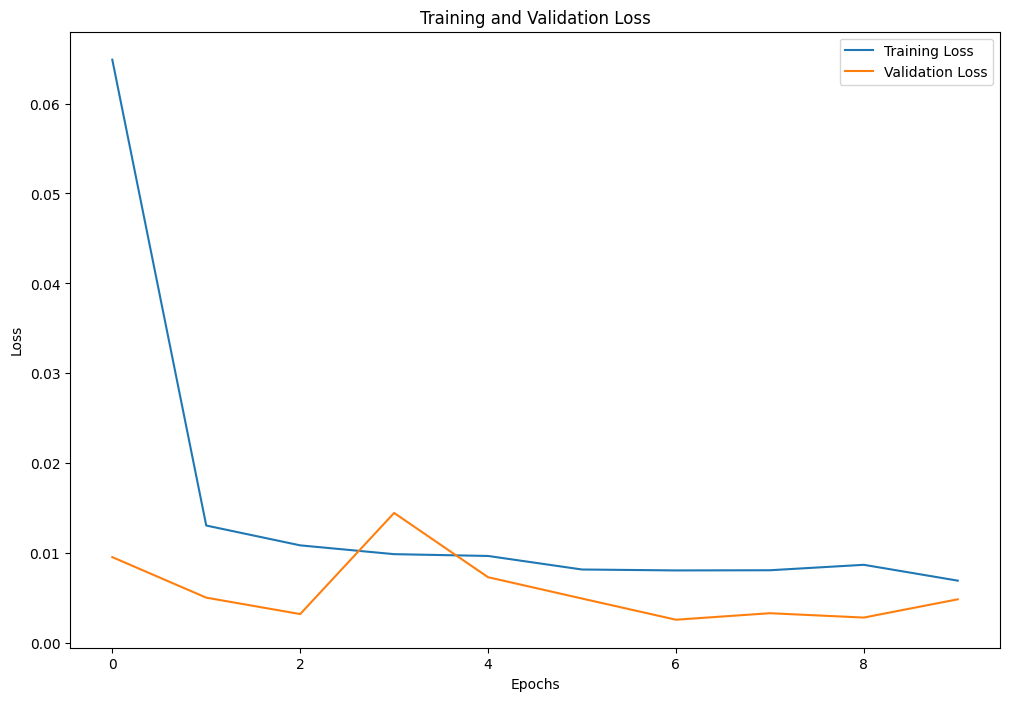

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Prepare test data
scaled_test_data = scaler.transform(test_df[['meantemp']].values)
X_test, Y_test = create_dataset(scaled_test_data, time_steps)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))

In [ ]:
# Make predictions
predictions = model.predict(X_test)

2/2 [==============================] - 3s 256ms/step


In [ ]:
# Inverse scaling for predictions and actual values
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(np.reshape(Y_test, (-1, 1)))

In [ ]:
# Calculate RMSE
RMSE = np.sqrt(np.mean((Y_test - predictions) ** 2)).round(2)
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 2.39


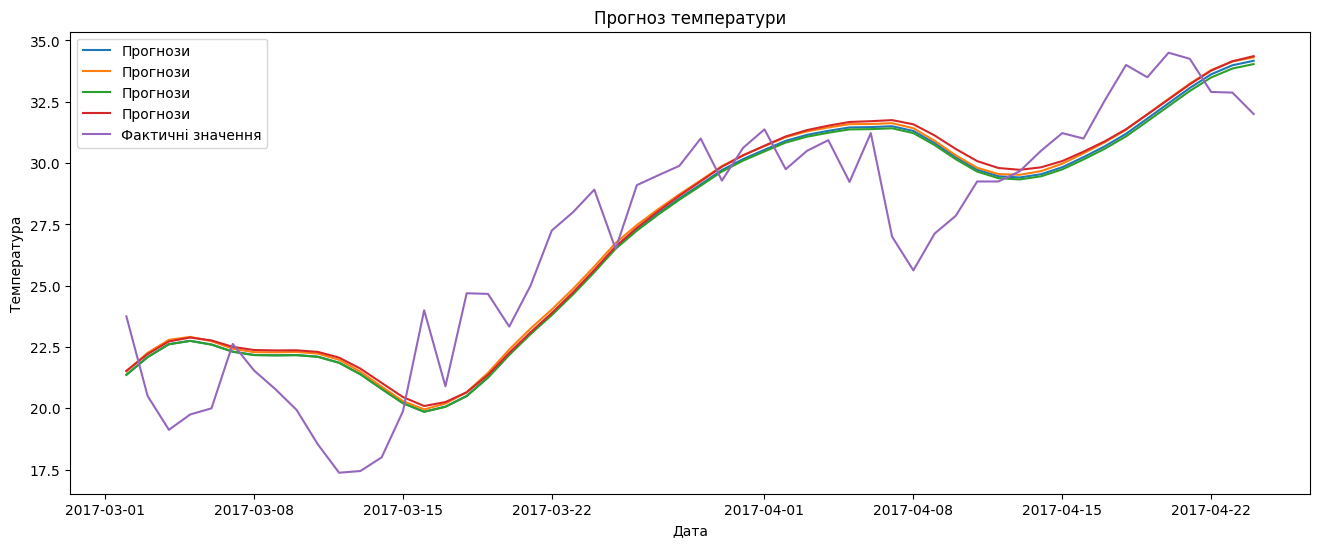

In [ ]:
dates = test_df.index[time_steps:]

plt.figure(figsize=(16, 6))
plt.plot(dates, predictions, label='Predictions')
plt.plot(dates, Y_test, label='Actual values')
plt.title('Temperature forecast')
plt.xlabel('Date')
plt.ylabel('Теmperature')
plt.legend()
plt.show()